### ЭКЗАМЕНАЦИОННЫЙ БИЛЕТ № 28

1 вопрос (20 баллов)
Соединение таблиц с помощью оператора JOIN. Схема результата. Ключевые слова LEFT, RIGHT, INNER.

Если в операторе SELECT после ключевого слова FROM указывается не одна, а две таблицы, то в результате выполнения запроса, в котором отсутствует предложение WHERE или JOIN, каждая строка одной таблицы будет соединена с каждой строкой второй таблицы. Соединение таблиц имеет смысл тогда, когда соединяются не все строки исходных таблиц, а только те, которые интересуют пользователя. Такое ограничение может быть осуществлено с помощью использования в запросе соответствующего условия в предложении JOIN. Таким образом, SQL позволяет выводить информацию из нескольких таблиц, связывая их по значениям определенных полей. Это соединение считается внутренним (INNER) Это можно сделать с помощью следующего запроса:

SELECT STUDENT.SURNAME, UNIVERSITY.UNIV_NAME, STUDENT.CITY
FROM STUDENT INNER JOIN UNIVERSITY
ON STUDENT.CITY = UNIVERSITY.CITY;

В Пайтон для выполнения операции соединения таблиц мы будем использовать функции join() и select_from().

Как отмечалось ранее, при использовании внутреннего (INNER) соединения таблиц соединяются только те их строки, в которых совпадают значения полей, задаваемые в предложении WHERE или JOIN запроса. Однако во многих случаях это может привести к нежелательной потере информации. 
Если нам необходимо вывести также отсутствующие строки, то мы используем LEFT/RIGHT OUTER JOIN

SELECT SURNAME, MARK
FROM STUDENT LEFT OUTER JOIN EXAM_MARKS
ON STUDENT.STUDENT_ID = EXAM_MARKS.STUDENT_ID;

При использовании левого соединения расширение выводимой таблицы осуществляется за счет записей входной таблицы, имя которой указано слева от оператора JOIN.

На языке программирования Python внешнее соединение реализуется с помощью функции

function sqlalchemy.sql.expression.outerjoin(left, right, onclause=None, full=False)

В таком случае данные левой таблицы - берутся полностью, а пустые значения второй таблицы заполняются NaN

### 2. С помощью библиотеки SQLAlchemy создайте объекты таблиц базы данных Chinook. Создайте запрос, который показывает название произведения (Track), имя исполнителя (Artist), идентификатор строки заказа (InvoiceLine) для всех купленных произведений в стиле World (Genre). Отсортируйте результат по названию трека.

In [1]:
from sqlalchemy import MetaData, Table, create_engine, select, and_, or_, not_, cast
from sqlalchemy import String, Numeric, Float, Integer
from sqlalchemy.sql import func, alias, desc, exists

import pandas as pd
from matplotlib import pyplot

engine = create_engine('sqlite:///Data/Chinook_Sqlite.sqlite')
metadata = MetaData()
metadata.reflect(bind=engine)
conn=engine.connect()

Album=Table("Album", metadata, autoload=True, autoload_with="engine")
Artist=Table("Artist", metadata, autoload=True, autoload_with="engine")
Customer=Table("Customer", metadata, autoload=True, autoload_with="engine")
Employee=Table("Employee", metadata, autoload=True, autoload_with="engine")
Track=Table("Track", metadata, autoload=True, autoload_with="engine")
Genre=Table("Genre", metadata, autoload=True, autoload_with="engine")
Invoice=Table("Invoice", metadata, autoload=True, autoload_with="engine")
InvoiceLine=Table("InvoiceLine", metadata, autoload=True, autoload_with="engine")
Playlist=Table("Playlist", metadata, autoload=True, autoload_with="engine")
PlaylistTrack=Table("PlaylistTrack", metadata, autoload=True, autoload_with="engine")
MediaType=Table("MediaType",metadata, autoload=True, autoload_with="engine")

print(metadata.tables.keys())

dict_keys(['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'Track', 'MediaType', 'Playlist', 'PlaylistTrack'])


In [2]:
T = Track.alias('T')
Ar = Artist.alias('Ar')
Al = Album.alias('Al')
G = Genre.alias('G')
Il = InvoiceLine.alias('Il')

s = select(T.c.Name, Ar.c.Name, Il.c.InvoiceLineId)
s = s.where(and_(T.c.AlbumId == Al.c.AlbumId,
               Al.c.ArtistId == Ar.c.ArtistId,
               T.c.GenreId == G.c.GenreId,
               Il.c.TrackId == T.c.TrackId))
s = s.where(G.c.Name == 'World')
s = s.order_by(T.c.Name)
result = conn.execute(s).fetchall()
result

[('A Moça e a Chuva', 'Mônica Marianno', 2045),
 ('Aos Leões', 'Mônica Marianno', 899),
 ('Cafezinho', 'João Suplicy', 1401),
 ('Demorou!', 'Mônica Marianno', 900),
 ('Din Din Wo (Little Child)', 'Habib Koité and Bamada', 1127),
 ('Enquanto O Dia Não Vem', 'João Suplicy', 256),
 ('Equinocio', 'João Suplicy', 1973),
 ('Já Foi', 'Mônica Marianno', 327),
 ('No Futuro', 'João Suplicy', 1400),
 ('O Que Vai Em Meu Coração', 'Mônica Marianno', 2044),
 ('Papelão', 'João Suplicy', 828),
 ('Voce Inteira', 'João Suplicy', 255),
 ('É Fogo', 'Mônica Marianno', 1472)]

### 3. Записи набора данных imdb.csv содержат информацию о фильмах. Атрибут Rating каждой записи содержит значение рейтинга конкретного фильма. Постройте гистограмму распределения рейтинга фильмов.

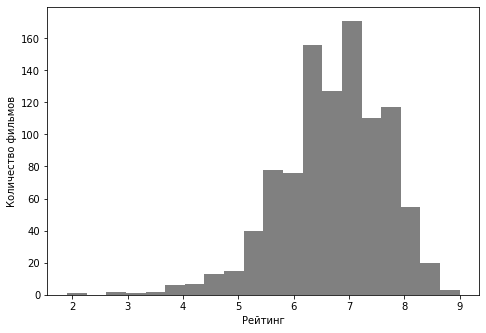

In [3]:
import matplotlib.pyplot as plt
df = pd.read_csv('./Data/imdb.csv')
fig=plt.figure()
axes=fig.add_axes([0,0,1,1])
axes.hist(df['Rating'],bins=20,color='grey')
axes.set_xlabel('Рейтинг')
axes.set_ylabel('Количество фильмов');